# Plotting graphs using many SNe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sncosmo
from bayesn import SEDmodel
import os
import pandas as pd
import math

## Generate a list of all SNe we have a file for

In [2]:
directory = os.fsencode("/root/partiiiproject/Archive")
supernovae_names = ["sn2006hb"]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"): 
        supernovae_names.append(filename[:-4])
        continue
    else:
        continue

## Load Model

In [9]:
filter_yaml = "/root/partiiiproject/bayesn-filters/bayesn-filters/filters.yaml"
model = SEDmodel(load_model='W22_model', filter_yaml = filter_yaml)

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /root/partiiiproject
Loading built-in model W22_model
Loading built-in reddening law F99


## Plotting redshift and distance

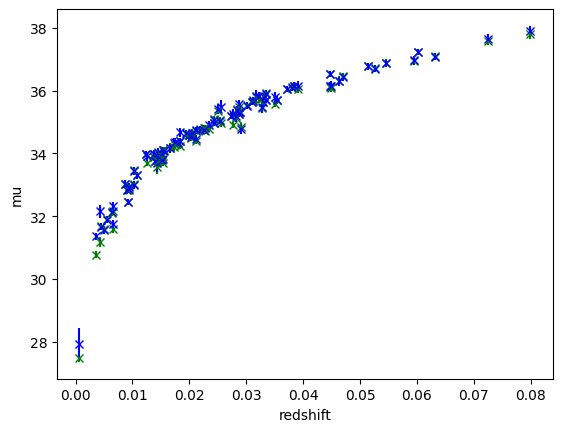

In [10]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu = samplesSummary.loc['mu[0]', 'mean']
        mu_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu, mu_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

plt.xlabel('redshift')
plt.ylabel('mu')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftG23vsF99"+".png", bbox_inches='tight') 
plt.show()

## Plotting a graph of Rv and Av Values

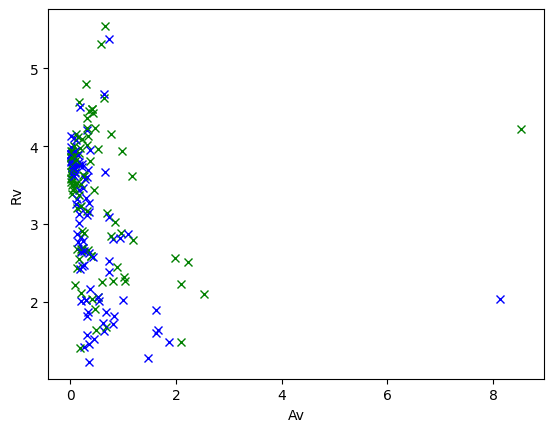

In [11]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'gx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'gx', label=dust_law)
    except FileNotFoundError:
        a=1
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        RV = samplesSummary.loc['RV[0]', 'mean']
        RV_std = samplesSummary.loc['RV[0]', 'sd']
        AV = samplesSummary.loc['AV[0]', 'mean']
        plt.plot(AV, RV, 'bx', label=dust_law)
        #plt.errorbar(AV, RV, RV_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         a=1

plt.xlabel('Av')
plt.ylabel('Rv')
plt.show()

## Difference in mu values - Learned nothing!

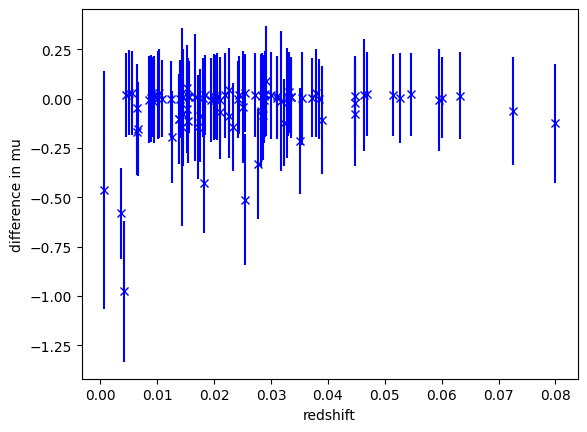

In [12]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        plt.errorbar(z, mu1-mu2, mu2_std+mu1_std, fmt=f'bx', label=dust_law)
    except FileNotFoundError:
         continue
        
plt.xlabel('redshift')
plt.ylabel('difference in mu')
#plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftdifferenceG23vsF99"+".png", bbox_inches='tight') 
plt.show()

## Difference of mu - with colour coding for Av values

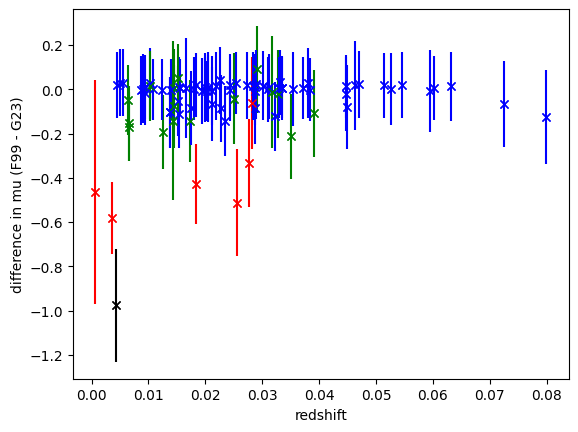

In [13]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        AV2 = samplesSummary.loc['AV[0]', 'mean']
        if 0<=AV2<=0.5:
            color = 'b'
        elif 0.5<=AV2<=1:
            color = 'g'
        elif 1<=AV2<=2:
            color = 'r'
        else:
            color = 'k'
        plt.errorbar(z, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'{color}x', label=dust_law)
        plt.plot(z, mu1-mu2, f'{color}x', label=dust_law)
    except FileNotFoundError:
         continue

plt.xlabel('redshift')
plt.ylabel('difference in mu (F99 - G23)')
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distanceredshiftdifferenceG23vsF99color"+".png", bbox_inches='tight') 
plt.show()

## Difference in mu against AV values for F99 law

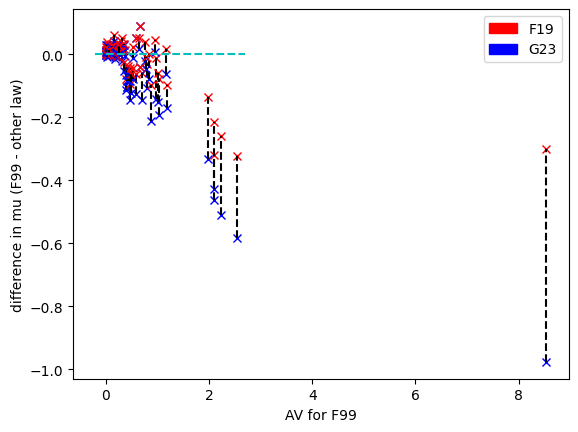

In [14]:
for supernova_name in supernovae_names:
    supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
    meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
    z = meta['REDSHIFT_FINAL']
    
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu1 = samplesSummary.loc['mu[0]', 'mean']
        mu1_std = samplesSummary.loc['mu[0]', 'sd']
        AV1 = samplesSummary.loc['AV[0]', 'mean']
    except FileNotFoundError:
        continue
    
    dust_law = "G23"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu2 = samplesSummary.loc['mu[0]', 'mean']
        mu2_std = samplesSummary.loc['mu[0]', 'sd']
        #plt.errorbar(AV2, mu1-mu2, math.sqrt(mu2_std**2+mu1_std**2), fmt=f'{color}x', label=dust_law)
        plt.plot(AV1, mu1-mu2, f'bx', label=dust_law)
    except FileNotFoundError:
         continue

    dust_law = "F19"
    try:
        sampleSummaryDir = "DustLawsFitOfAllSamples/"+supernova_name + dust_law + "_fit_summary.csv"
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        mu3 = samplesSummary.loc['mu[0]', 'mean']
        mu3_std = samplesSummary.loc['mu[0]', 'sd']
        plt.plot(AV1, mu1-mu3, f'rx', label=dust_law)
        plt.plot([AV1, AV1], [mu1-mu2, mu1-mu3], 'k--')
    except FileNotFoundError:
         continue

plt.xlabel('AV for F99')
plt.ylabel('difference in mu (F99 - other law)')
plt.plot([-0.2,2.7], [0,0], 'c--')
red_patch = mpatches.Patch(color='red', label='F19')
blue_patch = mpatches.Patch(color='blue', label='G23')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/distancedifferencesWithAVG23vsF99color"+".png", bbox_inches='tight') 
plt.show()